In [1]:
import pandas as pd
data=pd.read_csv("thanksgiving.csv",encoding="Latin-1")
#data[:3]


,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain


In [2]:
columns=data.columns
columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [8]:
freq=data["Do you celebrate Thanksgiving?"].value_counts()
yes_data=(data["Do you celebrate Thanksgiving?"]=="Yes")
data1=data[yes_data]
freq
#data1["Do you celebrate Thanksgiving?"]

Yes    980
Name: Do you celebrate Thanksgiving?, dtype: int64

In [11]:
freq1=data["What is typically the main dish at your Thanksgiving dinner?"].value_counts()
tofurkey_dinner=data["What is typically the main dish at your Thanksgiving dinner?"]=="Tofurkey"
data[tofurkey_dinner]["Do you typically have gravy?"][0:10] #Do you typically have gravy

4      Yes
33     Yes
69      No
72      No
77     Yes
145    Yes
175    Yes
218     No
243    Yes
275     No
Name: Do you typically have gravy?, dtype: object

In [15]:
apple_null_bool=pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"])
pumpkin_null_bool=pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"])
pecan_null_bool=pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"])
null_val=apple_null_bool&pumpkin_null_bool&pecan_null_bool
ate_pies=data[null_val]
ate_pies.head(2)
#set of tuples eating any of each pie

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
5,4337929779,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Pacific
7,4337916002,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,Yes,Yes,Rural,18 - 29,Male,Prefer not to answer,Mountain


In [21]:

def age_int(age):
        if pd.isnull(age):
            return None
        age=age.split(" ")[0]
        age=age.replace("+","")
        return int(age)
data["new_age"]=data["Age"].apply(age_int)


In [25]:
desc=data["new_age"].describe()
print(desc)

count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: new_age, dtype: float64


Numerical Description of the Age Categories.
Various Constraints have been applied on the table to retrieve necessary results for analysis.

In [28]:
def extr_int(dollar):
    if pd.isnull(dollar):
        return None
    first_dollar=dollar.split(" ")[0]
    if first_dollar=="Prefer":
        return None
    first_dollar=first_dollar.replace(",","")
    first_dollar=first_dollar.replace("$","")
    return int(first_dollar)
data["int_income"]=data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(extr_int)
print(data["int_income"][:5])

0     75000.0
1     50000.0
2         0.0
3    200000.0
4    100000.0
Name: int_income, dtype: float64


Extracting the minimum integer part from the earning part of all the members of the household last year and assigning it to a seperate column.

25000.0     166
75000.0     127
50000.0     127
100000.0    109
10000.0      60
0.0          52
125000.0     48
Name: int_income, dtype: int64


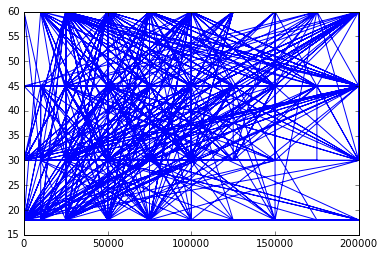

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
thanksgiving_travel=(data["int_income"]<150000)
thanksgiving_travel=data[thanksgiving_travel]
tgt_freq=thanksgiving_travel["int_income"].value_counts()
print(thanksgiving_travel["int_income"].value_counts())

plt.plot(data["int_income"],data["new_age"])
plt.show()


For lesser ages the frequency of people earning high income is really less or negligible


In [55]:
data.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
                 columns='Have you ever attended a "Friendsgiving?"',
                 values="new_age")

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


In [57]:
data.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
                 columns='Have you ever attended a "Friendsgiving?"',
                 values="int_income")

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842
